In [51]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely.wkt import loads
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from shapely.geometry import Polygon
import math
import shapely.affinity # shapely.affinity.scale を使用するため

# 日本語フォントの設定
font_path = 'C:/Windows/Fonts/msgothic.ttc'  # MS Gothicフォントのパス
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'MS Gothic'

In [69]:
plateau_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/train/feature_engineering/apart/15202_apart.parquet"
plateau = gpd.read_parquet(plateau_path)

In [70]:
plateau.columns

Index(['geometry', 'KEY_CODE', 'PREF_NAME', 'CITY_NAME', 'S_NAME', '年少人口',
       '生産年齢人口', '老年人口', '出生時から', '1年未満', '1年以上5年未満', '5年以上10年未満',
       '10年以上20年未満', '20年以上', '居住期間「不詳」', '00_総数', '01_500万円未満',
       '07_500～1000万円未満', '09_1000以上', '一戸建', '長屋建', '共同住宅', 'buildingID',
       'class', 'usage', 'area', 'perimeter', 'rectangularity', 'convexity',
       'moment_of_inertia', 'num_corners', 'anisotropy', 'longest_axis',
       'elongation', 'orientation', 'type_堅ろう建物', 'type_堅ろう無壁舎', 'type_普通建物',
       'type_普通無壁舎', 'usage_area_1.0', 'usage_area_2.0', 'usage_area_3.0',
       'usage_area_4.0', 'usage_area_5.0', 'usage_area_6.0', 'usage_area_7.0',
       'usage_area_8.0', 'usage_area_9.0', 'usage_area_10.0',
       'usage_area_11.0', 'usage_area_12.0', 'usage_area_21.0',
       'usage_area_99.0', 'unique_id', 'center', 'buffer', '1_amenity',
       '1_shop', '1_tourism', '3_amenity', '3_shop', '3_tourism', '5_amenity',
       '5_shop', '5_tourism'],
      dtype='object')

In [66]:
plateau[(plateau['type_堅ろう建物'] == 1) & (plateau['usage'] == 411)]

,geometry,KEY_CODE,PREF_NAME,CITY_NAME,S_NAME,年少人口,生産年齢人口,老年人口,出生時から,1年未満,...,1_amenity,1_shop,1_tourism,3_amenity,3_shop,3_tourism,5_amenity,5_shop,5_tourism,rectangularity
11586,"POLYGON ((29565.760 156084.130, 29565.790 1560...",152020860,新潟県,長岡市,下条町,0.093392,0.545374,0.359471,0.196476,0.029075,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,2.0,0.0,0.971848
12732,"POLYGON ((29116.800 149351.290, 29103.280 1493...",152021160,新潟県,長岡市,妙見町,0.086614,0.527559,0.381890,0.362205,0.015748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864527
12735,"POLYGON ((25569.870 154888.600, 25585.550 1548...",152023110,新潟県,長岡市,浦,0.127217,0.516472,0.353776,0.241764,0.052205,...,NaN,NaN,NaN,3.0,1.0,0.0,4.0,2.0,0.0,0.999833
16019,"POLYGON ((29422.240 150946.590, 29419.700 1509...",152021130,新潟県,長岡市,六日市町,0.092308,0.482051,0.425641,0.394872,0.012821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999894
16711,"POLYGON ((28333.980 155628.360, 28341.040 1556...",152021050,新潟県,長岡市,前島町,0.108197,0.501639,0.380328,0.390164,0.006557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121197,"POLYGON ((27495.820 170628.150, 27495.140 1706...",152025332,新潟県,長岡市,与板町与板,0.111718,0.494541,0.392285,0.263100,0.025837,...,1.0,0.0,0.0,5.0,0.0,0.0,11.0,2.0,0.0,0.956933
121437,"POLYGON ((27680.810 171082.080, 27681.060 1710...",152025332,新潟県,長岡市,与板町与板,0.111718,0.494541,0.392285,0.263100,0.025837,...,1.0,0.0,0.0,9.0,2.0,2.0,12.0,2.0,4.0,0.933591
124319,"POLYGON ((27283.170 170570.200, 27284.730 1705...",152025332,新潟県,長岡市,与板町与板,0.111718,0.494541,0.392285,0.263100,0.025837,...,NaN,NaN,NaN,6.0,0.0,0.0,9.0,0.0,0.0,0.999985
145931,"POLYGON ((44657.357 164694.762, 44660.235 1646...",15202464002,新潟県,長岡市,巻渕二丁目,0.139535,0.511628,0.348837,0.279070,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.979269


In [49]:
# scaling_polygon 関数 (提供されたものそのまま)
def scaling_polygon(polygon):
    if isinstance(polygon, Polygon) and polygon.area != 0:
        scale_factor = math.sqrt(1.0 / polygon.area) # 面積1にスケーリングするための因子
        scaled_polygon = shapely.affinity.scale(
            polygon, xfact=scale_factor, yfact=scale_factor, origin=(0, 0)) # afine変換でスケーリング
        return scaled_polygon
    else:
        raise ValueError("invalid polygon @[scaling_polygon]")

# calculate_rectangularity 関数 (提供されたものそのまま)
# 静的メソッドとして定義されていますが、クラスの外で関数として使用します
def calculate_rectangularity(geometry):
    '''
    矩形度を計算する関数
    '''
    if isinstance(geometry, Polygon):
        area = geometry.area
        # 最小外接矩形を計算
        min_rect = geometry.minimum_rotated_rectangle
        min_rect_area = min_rect.area

        if min_rect_area != 0:
            return area / min_rect_area
        else:
            # 面積がゼロの矩形は計算できないか、非常に細長いジオメトリの可能性があります。
            # この場合、エラーを発生させるか、特定の値を返すかを検討してください。
            # 例: 極端に細長い場合は0として扱う、またはNaNとする
            # raise ValueError("Invalid polygon @[calculate_rectangularity]: input must be a non-zero area polygon")
            # 非常に小さい面積のmin_rect_areaの場合、矩形度が非常に大きくなるため注意が必要です。
            # ここでは0を返すようにしていますが、NaNや特定のデフォルト値を検討することもできます。
            return 0.0 # または np.nan, あるいは何らかの例外処理
    else:
        raise ValueError("Invalid polygon @[calculate_rectangularity]: input must be a Polygon")

In [61]:
for index, row in plateau.iterrows():
    geom = row['geometry']
    try:
        if isinstance(geom, Polygon) and geom.area > 0:
            plateau.at[index, 'rectangularity'] = calculate_rectangularity(geom)
        else:
            # Polygonではない、または面積がゼロのジオメトリの場合
            plateau.at[index, 'rectangularity'] = None # または np.nan
    except ValueError as e:
        print(f"Error calculating rectangularity for row {index}: {e}. Setting to None.")
        plateau.at[index, 'rectangularity'] = None # 計算エラーの場合もNone

<Axes: xlabel='usage'>

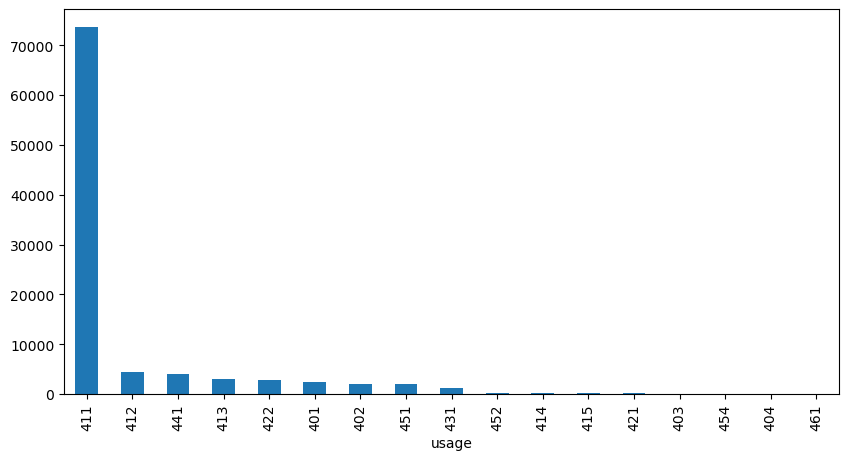

In [17]:
plateau['usage'].value_counts().plot(kind='bar', figsize=(10, 5))

In [67]:
plateau['usage'].value_counts()

usage
411.0    73548
412.0     4367
441.0     4071
413.0     2969
422.0     2788
401.0     2504
402.0     1997
451.0     1929
431.0     1133
452.0      269
414.0      268
415.0      194
421.0      171
403.0      106
454.0      102
404.0       78
461.0        1
Name: count, dtype: int64

In [ ]:
411
412
441
413
422
401
402
451
431
452
414
415
421
403
454
404

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


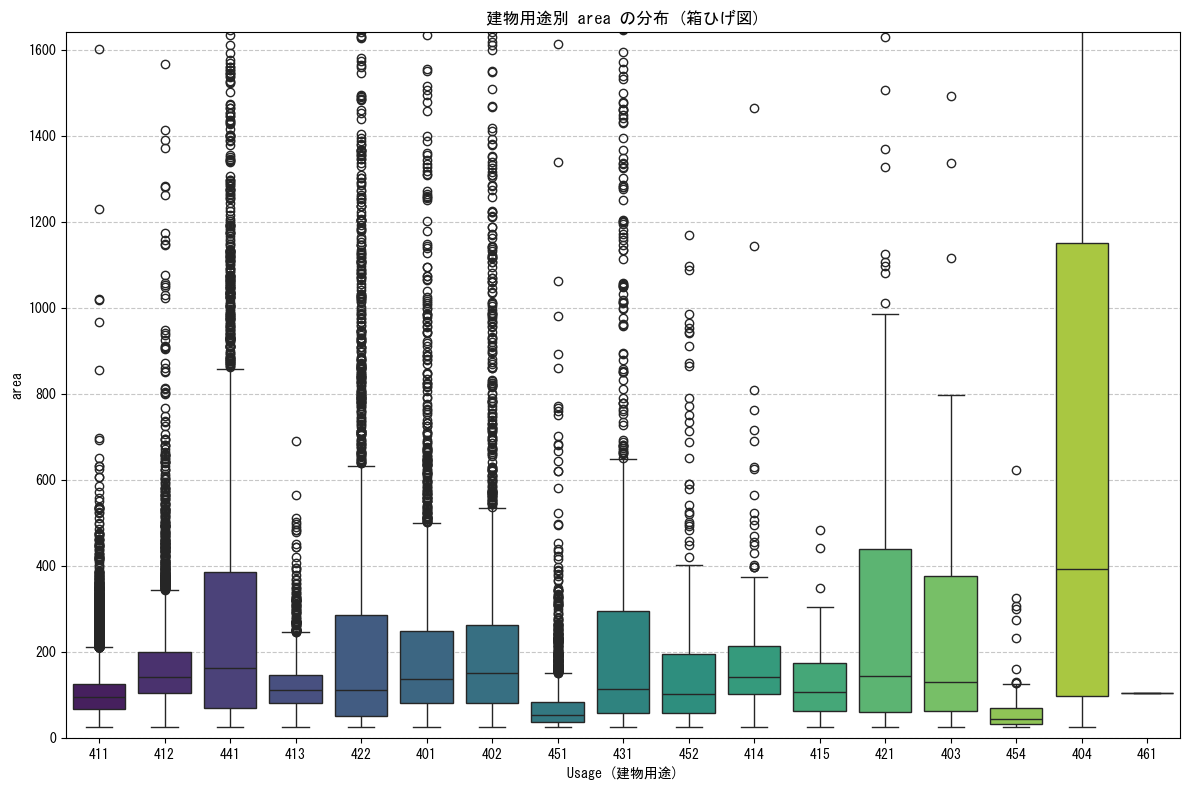

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


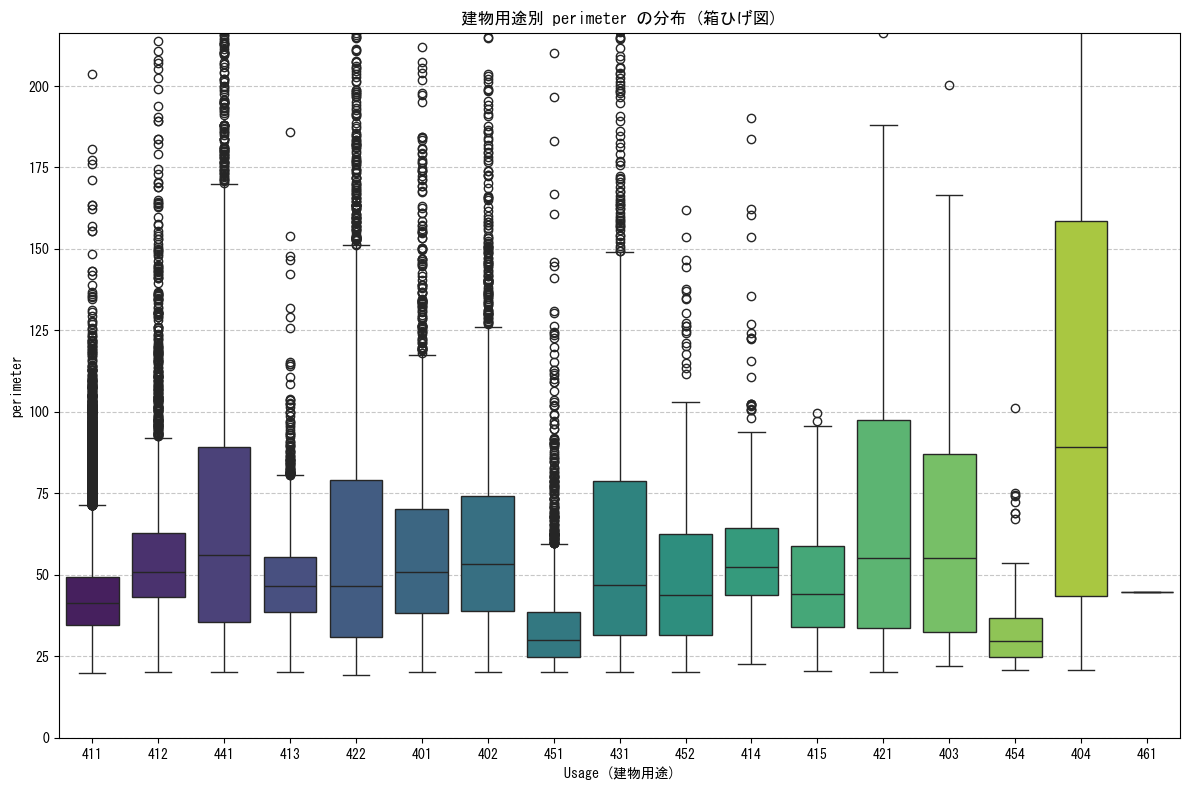

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


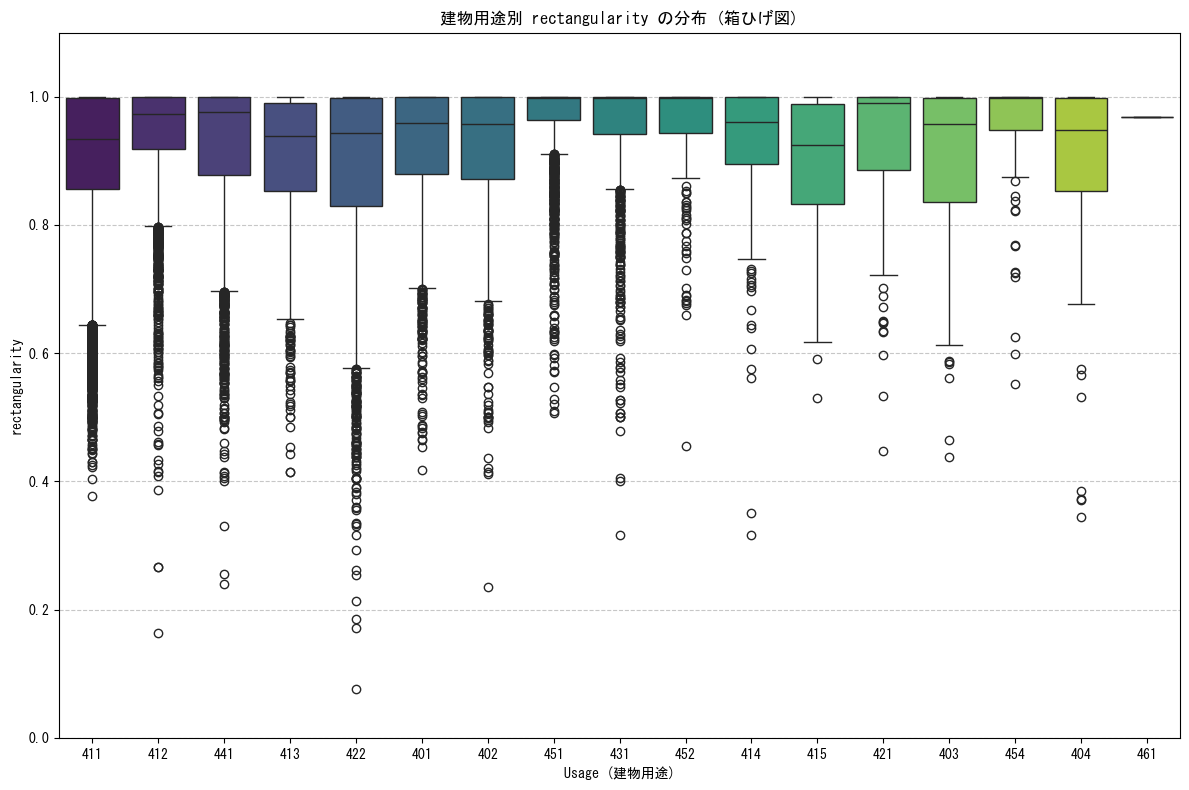

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


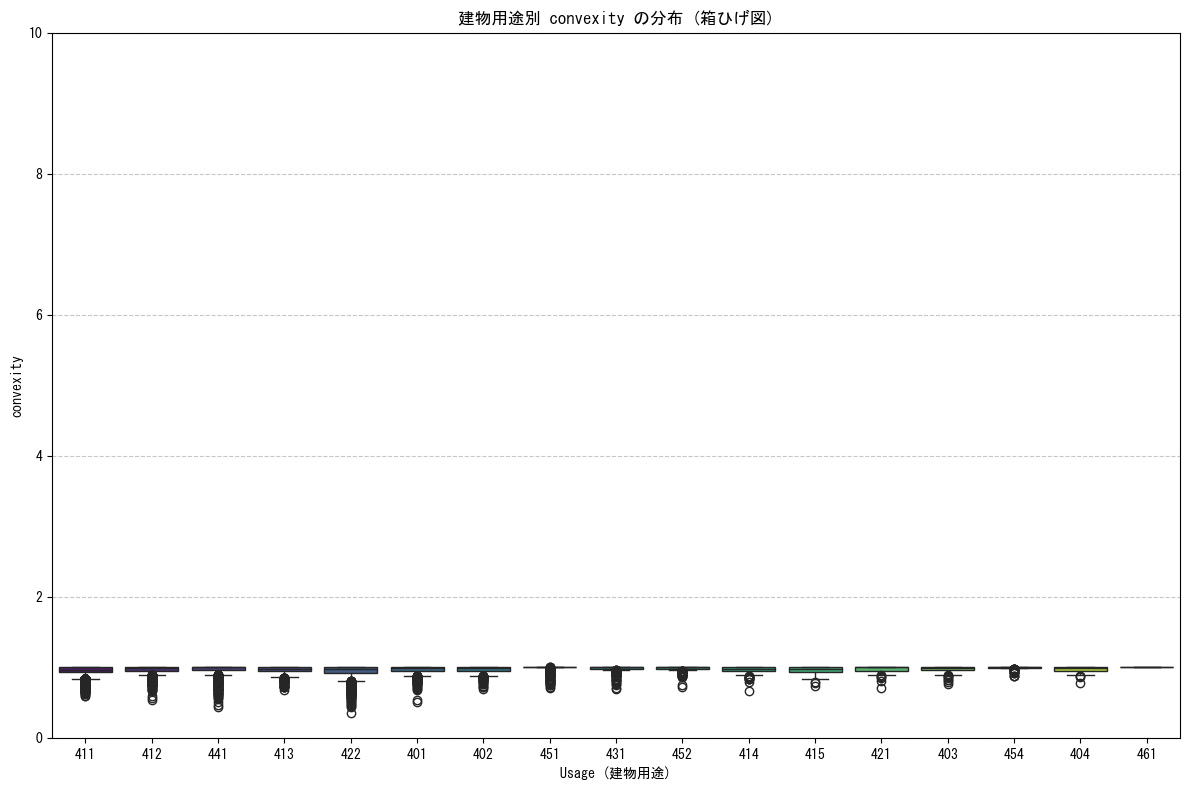

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


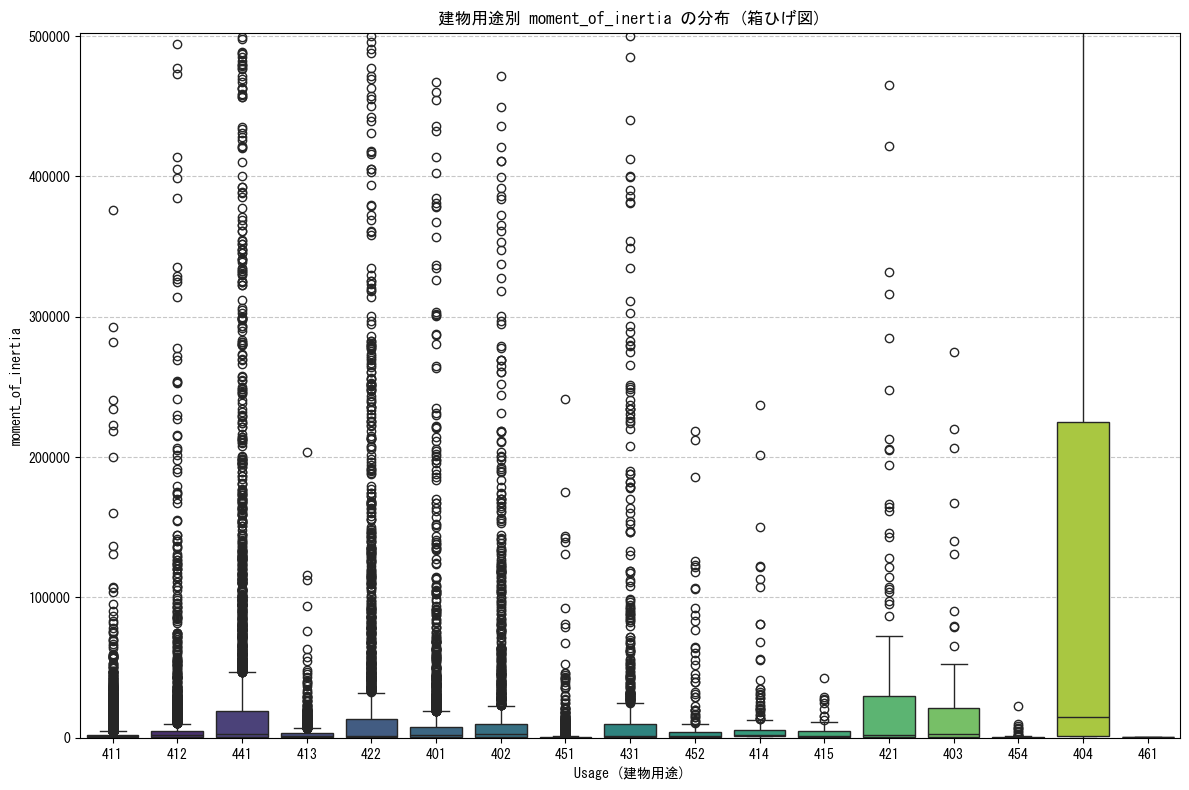

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


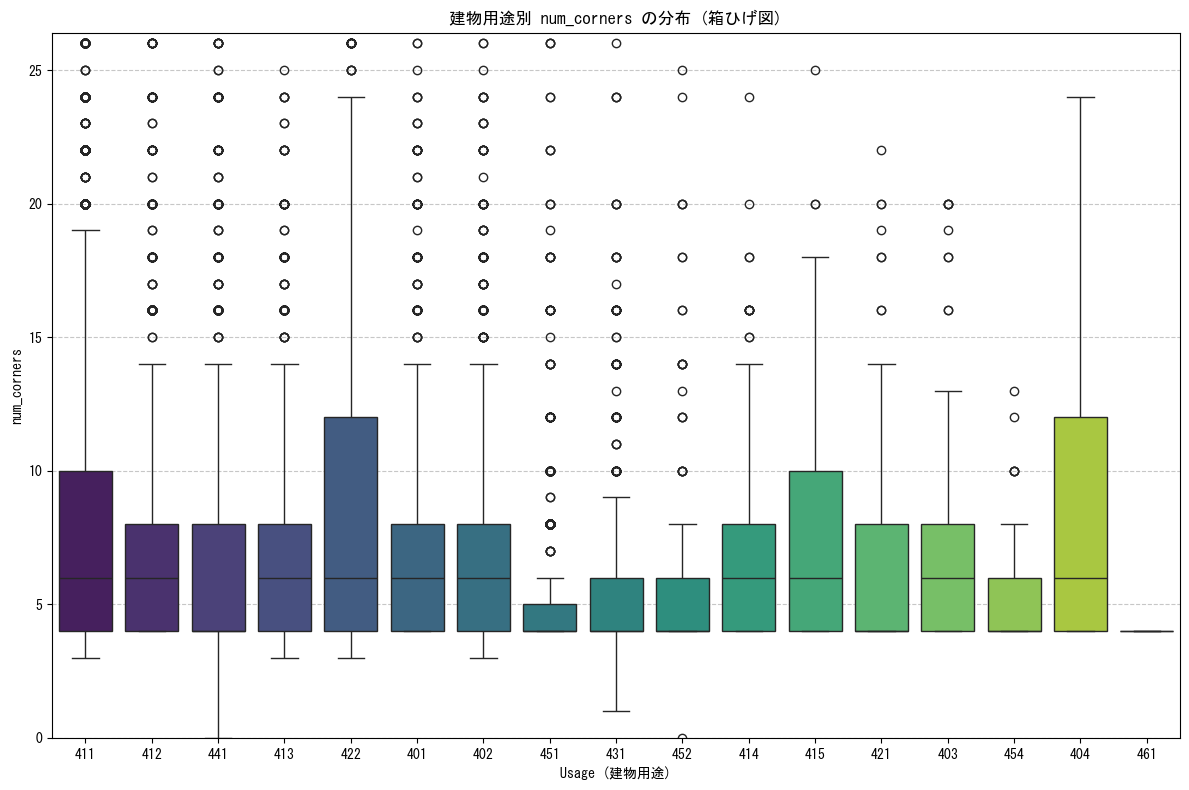

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


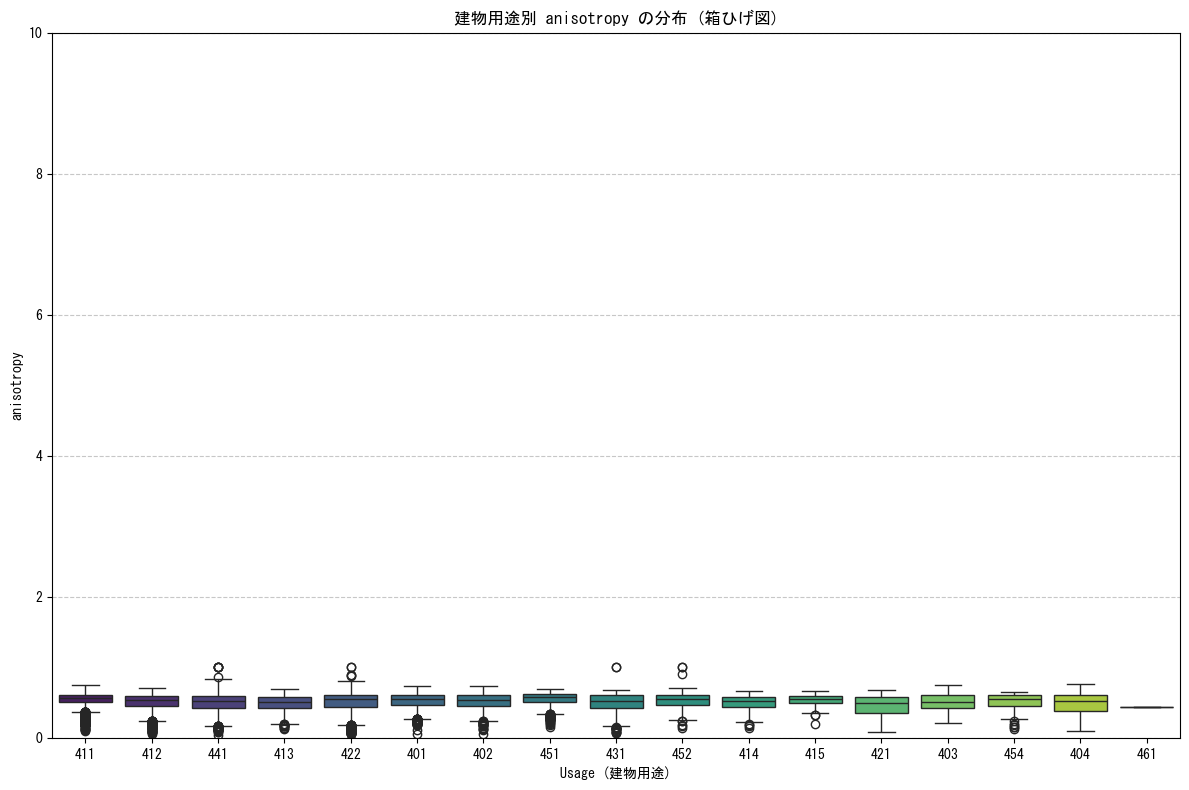

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


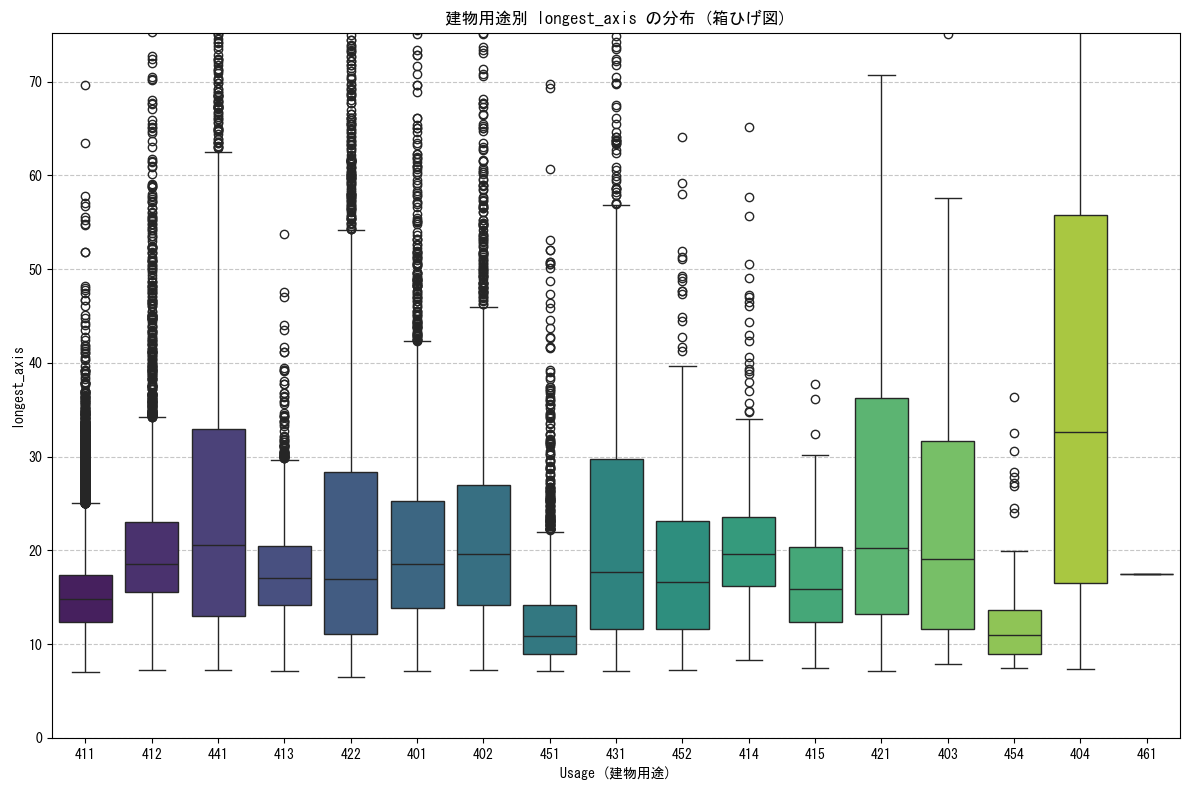

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


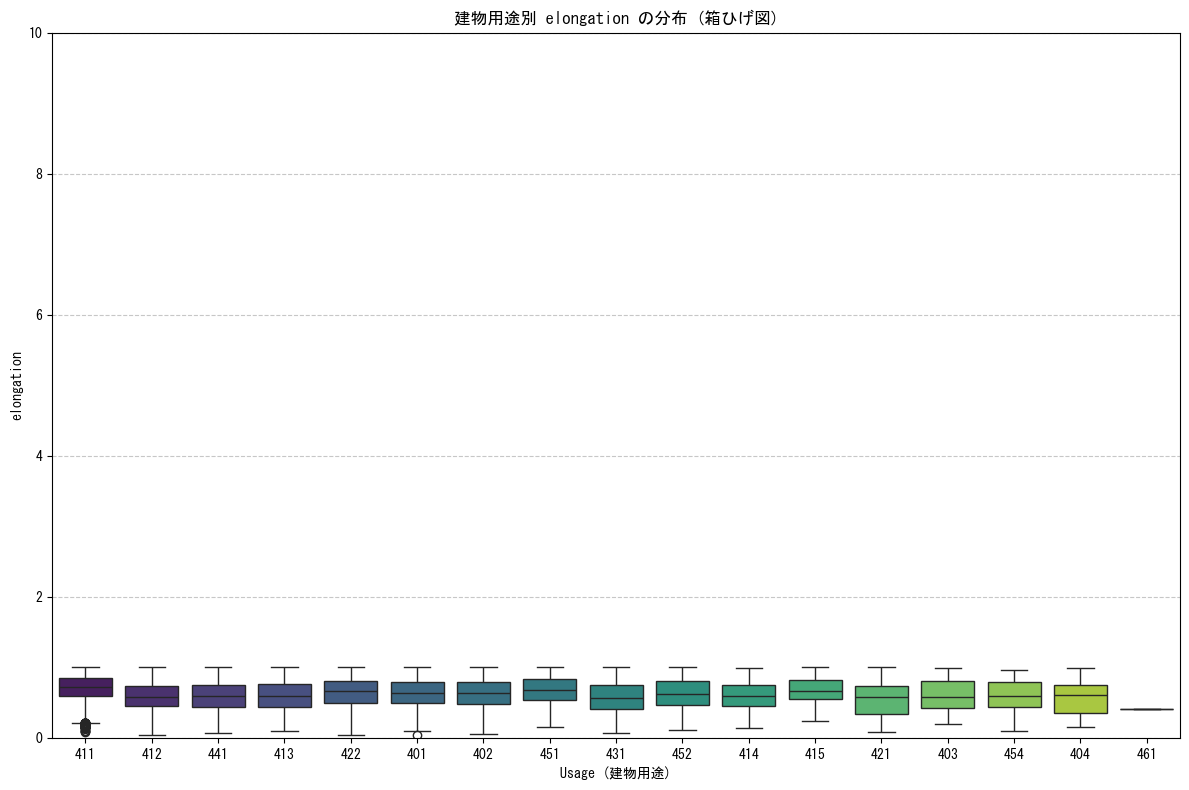

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\1520609276.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)


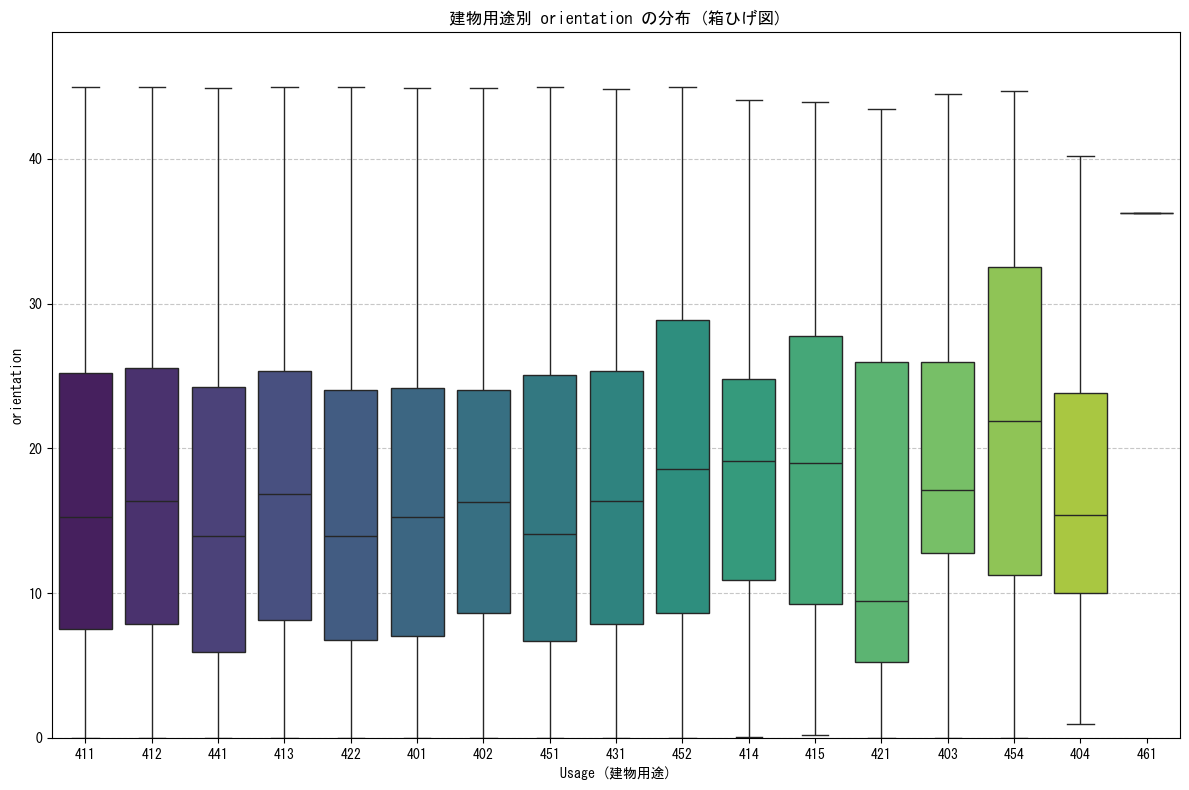

In [72]:
cols = ['area', 'perimeter', 'rectangularity', 'convexity',
       'moment_of_inertia', 'num_corners', 'anisotropy', 'longest_axis',
       'elongation', 'orientation']

# ループに入る前に、usageカラムの各要素の出現頻度を計算し、降順にソートして順序リストを作成
# これを `original_plateau.dropna` 後に行うことで、欠損値を除外したデータに基づいて順序を決定します。
# ただし、`original_plateau`は各ループで更新されるため、この`usage_order`の計算場所が重要です。
# 全てのプロットで同じ順序を使いたいなら、ループの前に、全ての欠損値処理を行う前の`plateau`から順序を決定するのが良いでしょう。
# しかし、提示されたコードの構造に合わせ、各プロットのフィルタリング済みデータに基づいて順序を決定します。
# もし全てのカラムで全く同じUsage順にしたい場合は、この行をループの外に出し、
# 最初に一度だけ`plateau.dropna(subset=['usage'] + cols).copy()`などと、全カラムを考慮したデータで`value_counts()`を取るのが確実です。

# original_plateau をループの外で一度コピーし、ループ内で適宜フィルタリングする方が効率的です。
# userの意図を尊重し、現在のループ内の`original_plateau = plateau.copy()`はそのままに、
# その直後に順序を計算するロジックを挿入します。

for col in cols:
    # ループ内で元のplateauを変更しないように、コピーを保持
    # そして、このコピーに対してのみdropnaを適用
    current_plateau_filtered = plateau.copy()
    current_plateau_filtered = current_plateau_filtered.dropna(subset=['usage', col])

    # usageカラムの要素数が多い順にソートするための順序リストを作成
    # current_plateau_filteredに基づいて頻度を計算する
    usage_counts = current_plateau_filtered['usage'].value_counts()
    usage_order = usage_counts.index.tolist() # 頻度が多い順にインデックス（usageコード）を取得

    # 各カラムに適切なY軸の範囲を設定
    y_lower = 0 # 面積や長さは負の値にならないため下限は0

    if col == 'rectangularity':
        # 矩形度は通常0から1の範囲
        y_upper = 1.1 # 1より少し上まで表示し、上限を明確にする
    else:
        # その他の数値カラム（area, perimeter, rectangle）
        # データの99.5パーセンタイル値を上限とし、少しバッファを持たせる
        # これにより、ほとんどのデータポイントが表示され、極端な外れ値は除外されるか、Y軸の上限にクリップされる
        upper_percentile_value = current_plateau_filtered[col].quantile(0.995)
        y_upper = upper_percentile_value * 1.1 # 10%のバッファを追加

        # もし上限値が非常に小さい場合（例: 全ての値が0に近い場合など）の調整
        if y_upper == 0:
            y_upper = 1.0 # 少なくとも1.0は表示する
        elif y_upper < 10: # 例えば、上限が10未満の場合に調整（数値のスケールによる）
             # 最小値を設定するか、少し大きめにする
            y_upper = max(y_upper, 10.0) # 例として10.0を最小上限とする。データに合わせて調整してください。
        
        # 特にareaやperimeterが非常に大きい場合、グラフが見づらくなることがあるため、
        # ここで最大値をさらに調整することも検討できます（例: 閾値を設ける）
        # 例: if y_upper > 20000: y_upper = 20000 # 20000を超える値は表示しない

    # 下限が上限以上にならないように最終チェック
    if y_upper <= y_lower:
        y_upper = y_lower + 1.0 # 少なくとも1.0の範囲は確保する

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='usage', y=col, data=current_plateau_filtered, palette='viridis', order=usage_order)
    plt.title(f'建物用途別 {col} の分布 (箱ひげ図)') # タイトルを動的に変更
    plt.xlabel('Usage (建物用途)')
    plt.ylabel(col)
    plt.ylim(y_lower, y_upper) # 動的に設定されたY軸の範囲を適用
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
def scaling_polygon:

    if isinstance(polygon, Polygon) and polygon.area != 0:
        scale_factor = math.sqrt(1.0 / polygon.area) # 面積1にスケーリングするための因子
        scaled_polygon = shapely.affinity.scale(
            polygon, xfact=scale_factor, yfact=scale_factor, origin=(0, 0)) # afine変換でスケーリング
        return scaled_polygon
    else:
        raise ValueError("invalid polygon @[scaling_polygon]")

@staticmethod
def calculate_rectangularity:
    '''
    矩形度を計算する関数
    '''
    if isinstance(geometry, Polygon):
        area = geometry.area
        min_rect_area = geometry.minimum_rotated_rectangle.area  # 最小外接矩形
        if min_rect_area != 0:
            return area / min_rect_area
        else:
            raise ValueError("Invalid polygon @[calculate_rectangularity]: input must be a non-zero area polygon")
    else:
        raise ValueError("Invalid polygon @[calculate_rectangularity]: input must be a Polygon")

C:\Users\0141s\AppData\Local\Temp\ipykernel_4264\2236685369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='usage', y='area', data=plateau, palette='viridis', inner='quartile')


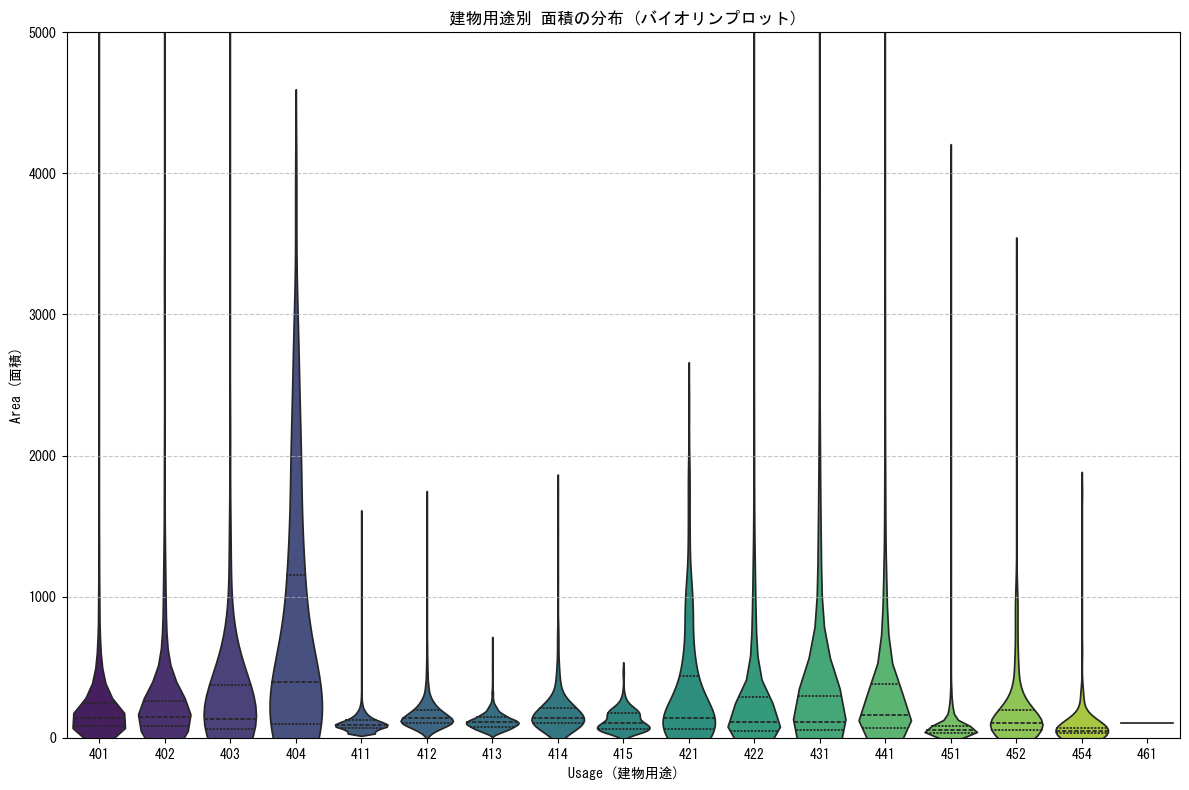

In [42]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='usage', y='area', data=plateau, palette='viridis', inner='quartile')
# inner='quartile' は箱ひげ図の四分位点を内部に表示します
plt.title('建物用途別 面積の分布 (バイオリンプロット)')
plt.xlabel('Usage (建物用途)')
plt.ylabel('Area (面積)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 5000) # X軸の範囲を0から5000に設定
plt.tight_layout()
plt.show()

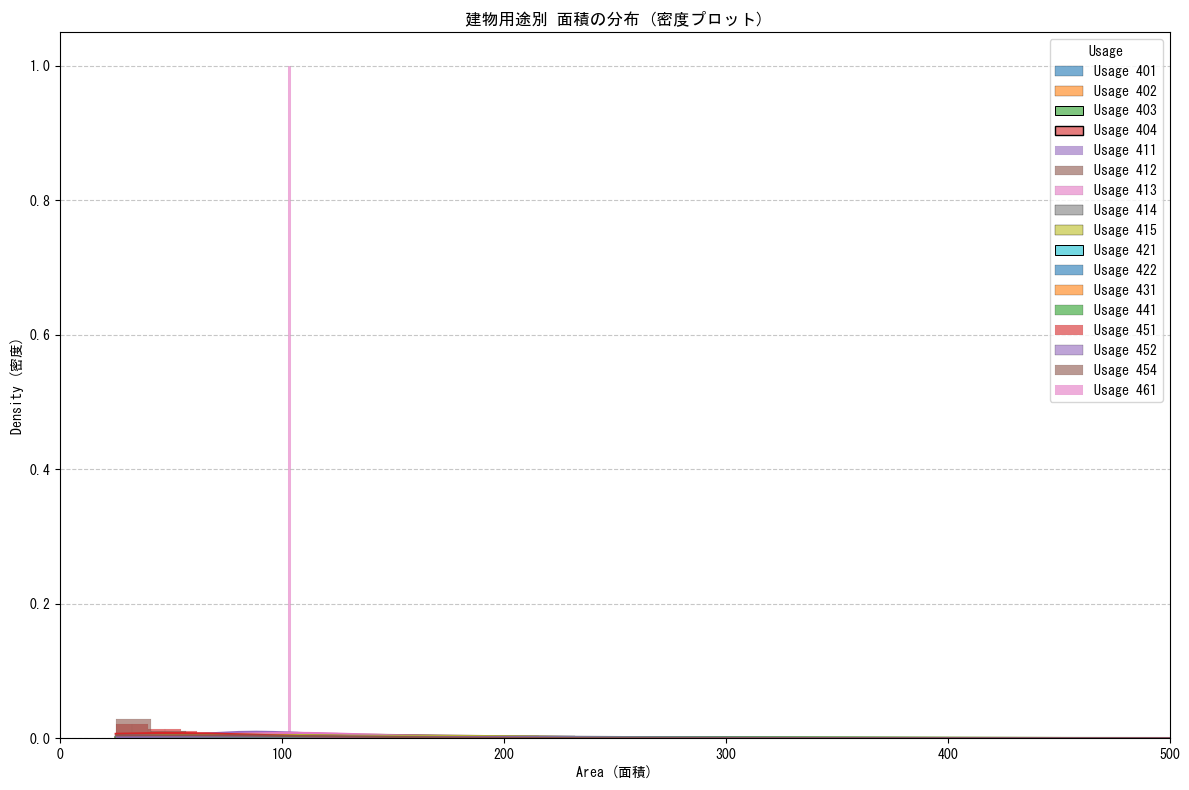

In [41]:
plt.figure(figsize=(12, 8))
for usage_code in sorted(plateau['usage'].unique()):
    subset = plateau[plateau['usage'] == usage_code]
    sns.histplot(subset['area'], kde=True, label=f'Usage {int(usage_code)}', alpha=0.6, stat="density", common_norm=False)
    # stat="density" で全体の合計が1になるように正規化
    # common_norm=False で各分布を独立して正規化

plt.title('建物用途別 面積の分布 (密度プロット)')
plt.xlabel('Area (面積)')
plt.ylabel('Density (密度)')
plt.legend(title='Usage')
plt.xlim(0, 500) # X軸の範囲を0から5000に設定
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
plateau['area'].describe()

count    96495.000000
mean       136.428802
std        290.901268
min         25.000625
25%         67.890504
50%         97.855976
75%        137.008978
max      20501.499945
Name: area, dtype: float64